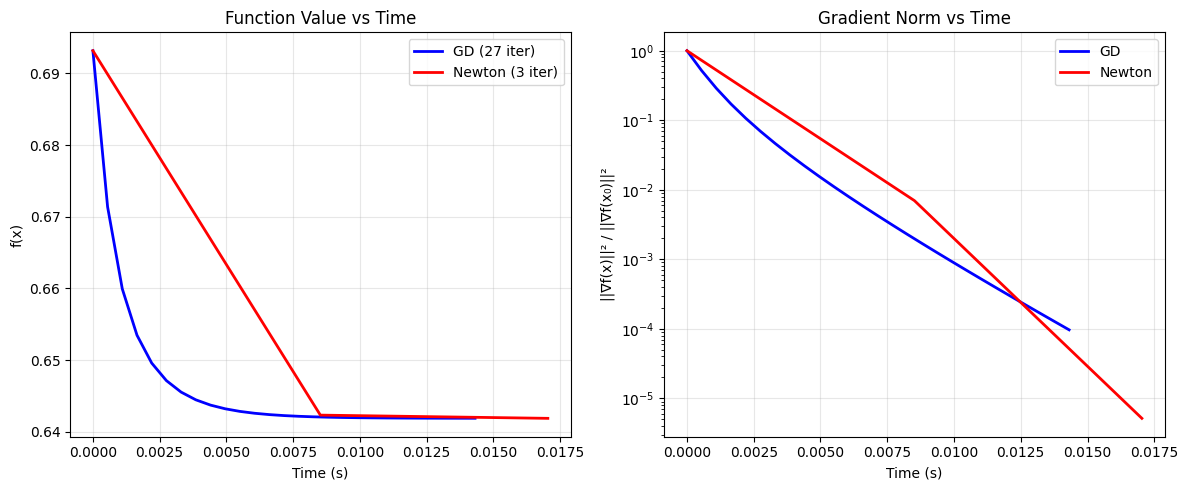


Результаты (m=1000, n=100):
GD: 27 iterations, 0.01s, final f(x)=0.641906
Newton: 3 iterations, 0.02s, final f(x)=0.641897


In [1]:
# Импорт необходимых библиотек
import numpy as np  # Для численных вычислений и работы с массивами
import matplotlib.pyplot as plt  # Для построения графиков
import time  # Для измерения времени выполнения

def quick_experiment():
    # Выводим заголовок эксперимента

    # Создаем синтетические данные
    m, n = 1000, 100  # 1000 примеров, 100 признаков - параметры датасета
    # Генерируем матрицу признаков размера m×n из нормального распределения
    A = np.random.randn(m, n)
    # Генерируем вектор меток: случайные значения ±1
    b = np.sign(np.random.randn(m))
    # Вычисляем коэффициент регуляризации как 1/количество_примеров
    regcoef = 1.0 / m

    # Импортируем необходимые функции (делаем здесь чтобы избежать циклических импортов)
    from oracles import create_log_reg_oracle  # Функция создания оракула логистической регрессии
    from optimization import gradient_descent, newton  # Методы оптимизации

    # Создаем оракул для логистической регрессии
    oracle = create_log_reg_oracle(A, b, regcoef)
    # Начальная точка - нулевой вектор размерности n
    x0 = np.zeros(n)

    # Список для хранения результатов всех методов
    methods = []

    # Запускаем градиентный спуск
    # Засекаем время начала выполнения
    start = time.time()
    # Вызываем градиентный спуск с параметрами:
    # - oracle: функция и ее производные
    # - x0: начальная точка
    # - tolerance: критерий остановки по норме градиента
    # - max_iter: максимальное число итераций
    # - trace: сохранять историю вычислений
    x_gd, msg_gd, hist_gd = gradient_descent(
        oracle, x0, tolerance=1e-4, max_iter=50, trace=True
    )
    # Вычисляем время выполнения градиентного спуска
    time_gd = time.time() - start
    # Сохраняем результаты: название метода, история, время, цвет для графика
    methods.append(('GD', hist_gd, time_gd, 'blue'))

    # Запускаем метод Ньютона
    # Снова засекаем время
    start = time.time()
    # Вызываем метод Ньютона с теми же параметрами
    x_newton, msg_newton, hist_newton = newton(
        oracle, x0, tolerance=1e-4, max_iter=50, trace=True
    )
    # Вычисляем время выполнения метода Ньютона
    time_newton = time.time() - start
    # Сохраняем результаты метода Ньютона
    methods.append(('Newton', hist_newton, time_newton, 'red'))

    # Строим графики для визуализации результатов
    # Создаем фигуру с 2 подграфиками размером 12×5 дюймов
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Обрабатываем результаты каждого метода
    for name, hist, t, color in methods:
        # Нормируем время: создаем равномерную шкалу времени от 0 до общего времени выполнения
        # Количество точек равно количеству записей в истории
        t_norm = np.linspace(0, t, len(hist['time']))

        # График 1: значение функции от времени
        # Строим линию: время по X, значение функции по Y
        ax1.plot(t_norm, hist['func'], color=color, linewidth=2, label=f'{name} ({len(hist["func"])} iter)')

        # График 2: относительная норма градиента от времени
        # Вычисляем квадрат нормы градиента в начальной точке
        grad_norm_0 = hist['grad_norm'][0] ** 2
        # Вычисляем относительные нормы градиента для всех итераций
        rel_grad = [g**2 / grad_norm_0 for g in hist['grad_norm']]
        # Строим график в полулогарифмическом масштабе (логарифм по Y)
        ax2.semilogy(t_norm, rel_grad, color=color, linewidth=2, label=f'{name}')

    # Настраиваем первый график
    ax1.set_xlabel('Time (s)')  # Подпись оси X - время в секундах
    ax1.set_ylabel('f(x)')  # Подпись оси Y - значение функции
    ax1.set_title('Function Value vs Time')  # Заголовок графика
    ax1.legend()  # Показываем легенду с названиями методов
    ax1.grid(True, alpha=0.3)  # Включаем сетку с прозрачностью 0.3

    # Настраиваем второй график
    ax2.set_xlabel('Time (s)')  # Подпись оси X - время в секундах
    # Подпись оси Y - относительная норма градиента в квадрате
    ax2.set_ylabel('||∇f(x)||² / ||∇f(x₀)||²')
    ax2.set_title('Gradient Norm vs Time')  # Заголовок графика
    ax2.legend()  # Показываем легенду
    ax2.grid(True, alpha=0.3)  # Включаем сетку

    # Автоматически подбираем расстояния между графиками
    plt.tight_layout()
    # Отображаем все графики
    plt.show()

    # Выводим текстовые результаты эксперимента
    print(f"\nРезультаты (m={m}, n={n}):")
    # Для каждого метода выводим статистику
    for name, hist, t, _ in methods:
        print(f"{name}: {len(hist['func'])} iterations, {t:.2f}s, final f(x)={hist['func'][-1]:.6f}")

# Условие выполнения кода только при прямом запуске файла
# (а не при импорте как модуля)
if __name__ == "__main__":
    # Запускаем быстрый эксперимент
    quick_experiment()